In [1]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

# Import the regression tree from scikit-learn and a plotting helper
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Import our train_test_split helper
from sklearn.model_selection import train_test_split

Prepare Dataset into target and features and split them into test train 

In [7]:
target_data = pd.read_csv("/Users/rubenstark/Documents/GitHub/Its-Wekk/4 - Data/2 - Ruben/Final_Target_Data_Combined_resid_Trend")

#features Dataset muss noch angepasst werden
features_data = pd.read_csv("/Users/rubenstark/Documents/GitHub/Its-Wekk/4 - Data/2 - Ruben/Working_DataFrame.csv")

In [ ]:
# Split our data intro features and targets
# Teile das Dataset in Features und Zielvariable
y = target_data["PM10_Combined_Trend_Residual"]  # Zielvariable
X = features_data.drop(columns=["Datum"])  # Alle Spalten außer der Zielvariable

X.head(10)

# Daten splitten
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=72)  # 10% von Gesamt

print("Train Size:", len(X_train))
print("Validation Size:", len(X_val))
print("Test Size:", len(X_test))

In [24]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results = []

# Expanding Cross Validation durchführen
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Modell trainieren
    #from sklearn.linear_model import LinearRegression
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)
    
    # Vorhersagen machen
    y_pred = tree.predict(X_test)
    
    # Berechne den Fehler
    mse = mean_squared_error(y_test, y_pred)
    results.append(mse)
    
    print(f"Fold {fold + 1}: MSE = {mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse = np.mean(results)
print(f"Durchschnittlicher MSE über alle Folds: {average_mse}")

Fold 1: MSE = 56.51553928600158
Fold 2: MSE = 98.25410181637454
Fold 3: MSE = 74.89105507684279
Fold 4: MSE = 140.466582347057
Fold 5: MSE = 103.0529770310885
Durchschnittlicher MSE über alle Folds: 94.63605111147288


# Build a Tree and fit it to the train Data



## Aufbau des Entscheidungsbaums
1. **Feature-Space-Aufteilung**: Der gesamte Merkmalsraum \( X \) wird in \( J \) Regionen \( R_1, R_2, \dots, R_J \) unterteilt.
2. **Vorhersage in den Regionen**: Für jede Region wird der Durchschnitt der Zielvariablen in dieser Region als Vorhersage verwendet.

Beispiel: Ein Entscheidungsbaum mit zwei Regionen \( R_1 \) und \( R_2 \) könnte Vorhersagen von 5 und 12 liefern, je nachdem, in welche Region ein neues Beispiel fällt.

---

## Aufteilung des Merkmalsraums
- **Vorgehen**: Der Merkmalsraum wird mit einem rekursiven, "top-down"-Ansatz (greedy) aufgeteilt:
  - **Schritt 1**: Für jedes Merkmal \( X_k \) werden mögliche Splitpunkte \( s \) getestet, die den Raum in zwei Regionen teilen:
    \[
    R_1 = \{x \mid x_k \leq s\}, \quad R_2 = \{x \mid x_k > s\}
    \]
  - **Schritt 2**: Die Aufteilung wird basierend auf einer Loss-Funktion bewertet (z. B. Mean Squared Error).
  - **Schritt 3**: Der Splitpunkt \( s \) und das Merkmal \( X_k \), die die Loss-Funktion minimieren, werden ausgewählt.

- **Rekursion**: Dieser Prozess wird wiederholt, indem jede Region weiter unterteilt wird, bis ein Abbruchkriterium erreicht wird (z. B. maximale Baumtiefe oder minimale Anzahl an Datenpunkten in einer Region).

---

## Ziel
Der Baum wird so aufgebaut, dass er die Zielvariable \( Y \) in den Regionen optimal vorhersagt, indem er die Varianz minimiert und die Struktur des zugrunde liegenden Datensatzes berücksichtigt.

In [ ]:
# DecisionTreeRegressor is just another sklearn estimator, we can use it
# like we would any other model
#tree = DecisionTreeRegressor()
#tree.fit(X_train, y_train) #Habebn wir das jetzt irgendwo festgehalten/definiert? 

DecisionTreeRegressor()

In [25]:
tree.tree_.max_depth

49

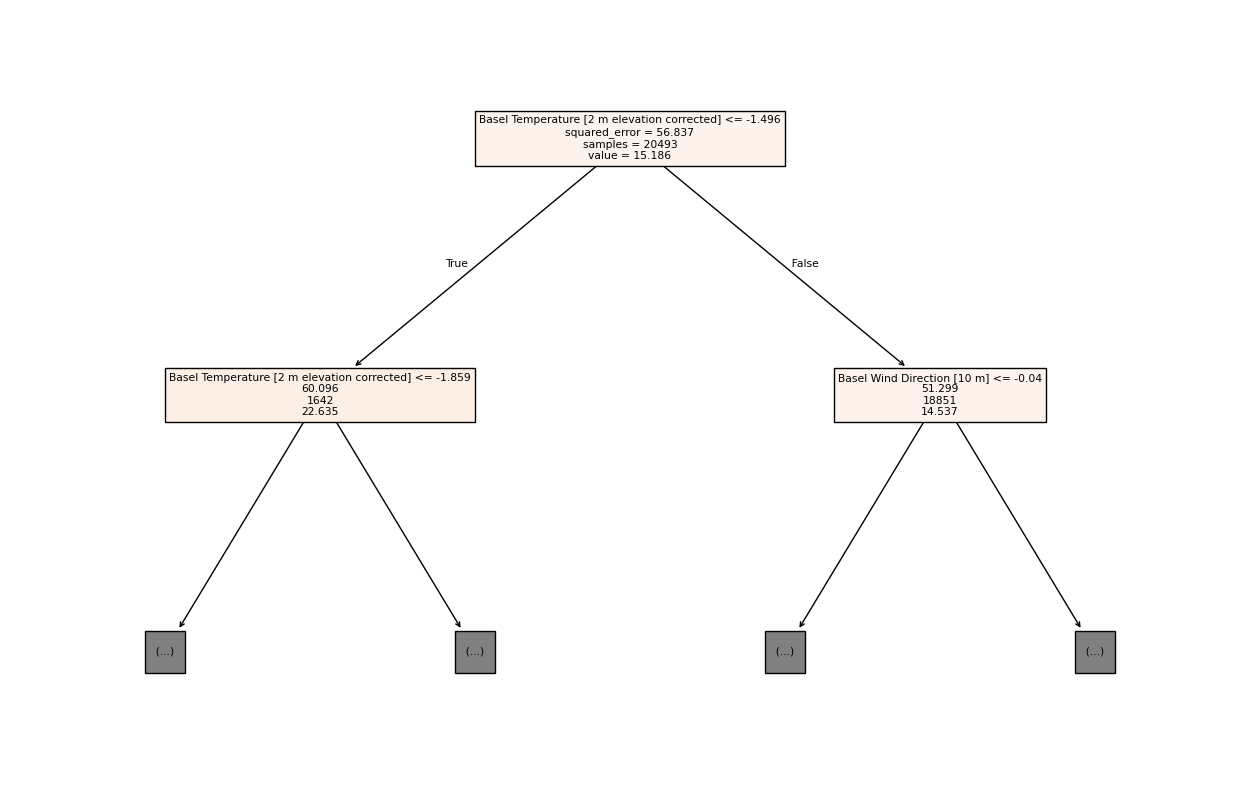

In [29]:
features = X_train.columns

fig, ax = plt.subplots(figsize=(16, 10))
plot_tree(tree, label="root", filled=True, max_depth=1, 
          feature_names=features, ax=ax);

Use ccp_alpha (and other parameters) to optimize the Decision Tree for example when it comes to overfitting

[`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [30]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results_ccp = []

# Expanding Cross Validation durchführen
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Modell trainieren
    #from sklearn.linear_model import LinearRegression
    tree_ccp = DecisionTreeRegressor(ccp_alpha=0.01)
    tree_ccp.fit(X_train, y_train)
    
    # Vorhersagen machen
    y_pred_ccp = tree_ccp.predict(X_test)
    
    # Berechne den Fehler
    mse_ccp = mean_squared_error(y_test, y_pred_ccp)
    results_ccp.append(mse)
    
    print(f"Fold {fold + 1}: MSE = {mse_ccp}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse_ccp = np.mean(results_ccp)
print(f"Durchschnittlicher MSE über alle Folds: {average_mse_ccp}")

Fold 1: MSE = 51.856561403169174
Fold 2: MSE = 91.39267829600847
Fold 3: MSE = 61.559197297698276
Fold 4: MSE = 135.95214176492595
Fold 5: MSE = 54.33333707123864
Durchschnittlicher MSE über alle Folds: 103.05297703108849


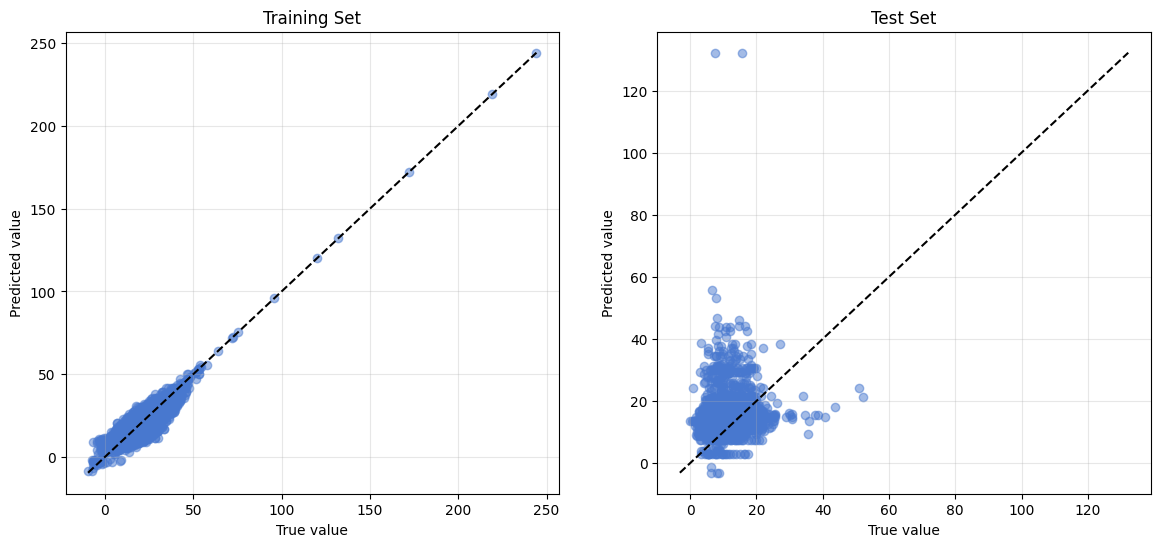

In [32]:
# Plot our predictions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Generate predictions
y_pred_train_ccp = tree_ccp.predict(X_train)
y_pred_test_ccp = tree_ccp.predict(X_test)

# Plot the training data
axs[0].scatter(y_train, y_pred_train_ccp, alpha=0.5, label="train")
# Plot a diagonal line
axs[0].plot(*[[np.minimum(y_train.min(), y_pred_train_ccp.min()), 
               np.maximum(y_train.max(), y_pred_train_ccp.max())] for _ in range(2)],
            color="black", ls="--")
axs[0].set_title("Training Set")

# Plot the test data
axs[1].scatter(y_test, y_pred_test_ccp, alpha=0.5, label="test")
# Plot a diagonal line
axs[1].plot(*[[np.minimum(y_test.min(), y_pred_test_ccp.min()), 
               np.maximum(y_test.max(), y_pred_test_ccp.max())] for _ in range(2)],
            color="black", ls="--")
axs[1].set_title("Test Set")

for ax in axs:
    ax.set_xlabel("True value")
    ax.set_ylabel("Predicted value")
    ax.grid(alpha=0.3)

plt.show()

Crossvalidation to find best alpha 

# Geht nicht mit so vielen Features

In [17]:
# Import our tools for model selection
from sklearn.model_selection import cross_validate, KFold

In [37]:
# Specify our CV strategy
cv = KFold(n_splits=5, shuffle=True, random_state=72)

# Specify the values of cost-complexity parameter to try
alphas = np.logspace(-2, 0, 200) #erzeugt werte von 10^-4 bis 10^0)

scores = [] # Store the cross-validation scores
scores_std = [] # Store the standard deviations of the scores

# Perform cross-validation
for alpha in alphas:
    tree_cv = DecisionTreeRegressor(ccp_alpha=alpha)
    # Cross validate the tree, 
    cv_results = cross_validate(tree_cv, X_train, y_train, cv=cv, 
                                scoring="neg_mean_squared_error")
    scores.append(-cv_results["test_score"].mean())
    scores_std.append(cv_results["test_score"].std())

KeyboardInterrupt: 

In [ ]:
# Create a new tree with the best alpha
tree_best = DecisionTreeRegressor(ccp_alpha=best_alpha)

# Fit the tree
tree_best.fit(X_train, y_train)

In [ ]:
# Plot our predictions
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Plot the training data
y_hat_train = tree_best.predict(X_train)
axs[0].scatter(y_train, y_hat_train, alpha=0.5, label="train")
# Plot a diagonal line
axs[0].plot(*[[np.minimum(y_train.min(), y_hat_train.min()), 
               np.maximum(y_train.max(), y_hat_train.max())] for _ in range(2)],
            color="black", ls="--")
axs[0].set_title("Training Set")

# Plot the test data
y_hat_test = tree_best.predict(X_test)
axs[1].scatter(y_test, y_hat_test, alpha=0.5, label="test")
# Plot a diagonal line
axs[1].plot(*[[np.minimum(y_test.min(), y_hat_test.min()), 
               np.maximum(y_test.max(), y_hat_test.max())] for _ in range(2)],
            color="black", ls="--")
axs[1].set_title("Test Set")

for ax in axs:
    ax.set_xlabel("True value")
    ax.set_ylabel("Predicted value")
    ax.grid(alpha=0.3)

Bagging

Bagging (Bootstrap Aggregating) ist eine Technik, um die Stabilität und Genauigkeit von Machine-Learning-Algorithmen zu verbessern, insbesondere bei Modellen wie Entscheidungsbäumen, die anfällig für hohe Varianz sind. Es basiert auf dem Bootstrapping-Prinzip, bei dem mehrere Trainingssets durch Zufallsstichproben mit Zurücklegen erzeugt werden.

Jeder Baum wird auf einem dieser zufälligen Datensets trainiert, und die Vorhersagen der B Modelle werden durch Mittelung kombiniert. Mathematisch reduziert Bagging die Varianz der Modelle, weil unabhängige Fehler über die Modelle hinweg geglättet werden. So wird die Vorhersage insgesamt stabiler und robuster gegen Variationen in den Trainingsdaten.

Das Ziel ist, Vorhersagefehler durch Mittelung der Outputs der individuellen Modelle zu minimieren, was insgesamt zu einer besseren Modellleistung führt.

In [33]:
# Import the regression tree from scikit-learn and a plotting helper
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Import our train_test_split helper
from sklearn.model_selection import train_test_split
# Import the mean_squared_error function under the alias mse
from sklearn.metrics import mean_squared_error as mse
# Import the resampling helper
from sklearn.utils import resample
# Import the sklearn implementation of bagging
from sklearn.ensemble import BaggingRegressor

B = 100

# Create a bagged tree estimator with B=100 trees
bagged_trees = BaggingRegressor(DecisionTreeRegressor(), n_estimators=B)

# Fit the bagged estimator and compute the MSE on the training set
bagged_trees.fit(X_train, y_train)

# Compute the predictions on the training and test sets
y_pred_train_bag = bagged_trees.predict(X_train)
y_pred_test_bag = bagged_trees.predict(X_test)

print("Train MSE: ", mse(y_train, y_pred_train_bag))
print("Test MSE : ", mse(y_test, y_pred_test_bag))

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results_bag = []

# Expanding Cross Validation durchführen
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Modell trainieren
    bagged_trees.fit(X_train, y_train)
    
    # Vorhersagen machen
    y_pred = bagged_trees.predict(X_test)
    
    # Berechne den Fehler
    mse = mean_squared_error(y_test, y_pred)
    results_bag.append(mse)
    
    print(f"Fold {fold + 1}: MSE = {mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse_bag = np.mean(results_bag)
print(f"Durchschnittlicher MSE über alle Folds: {average_mse_bag}")

Train MSE:  4.7181540630694645
Test MSE :  36.16760205040058
Fold 1: MSE = 30.630268120209507
Fold 2: MSE = 59.19733091420181
Fold 3: MSE = 41.16176623597949
Fold 4: MSE = 69.60997066259354
Fold 5: MSE = 36.106418329690094
Durchschnittlicher MSE über alle Folds: 47.34115085253488


Random Forrest

Random Forests erweitern Bagging, indem sie jedem Baum eine zusätzliche Zufallskomponente hinzufügen. Jeder Baum wird mit einem bootstrap-Sample der Trainingsdaten trainiert, wobei nur ein zufälliger Teil der Features für die Konstruktion des Baums verwendet wird. Dadurch unterscheidet sich Random Forests von klassischem Bagging, bei dem alle Features verfügbar sind.

Die zufällige Auswahl der Features reduziert die Korrelation zwischen den Bäumen und verbessert die Generalisierung des Modells. Üblicherweise wird die Anzahl der verwendeten Features  m  so gewählt, dass  m \approx \sqrt{p} , wobei  p  die Gesamtzahl der Features ist. Wenn  m = p  gesetzt wird, ist Random Forest gleichbedeutend mit einem Bagging-Modell.

In [36]:
# Import the random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=B, max_features="sqrt")
rf.fit(X_train, y_train)

# Compute the predictions on the training and test sets
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

print("Train MSE: ", mean_squared_error(y_train, y_pred_train_rf))
print("Test MSE : ", mean_squared_error(y_test, y_pred_test_rf))
# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
results_rf = []

# Expanding Cross Validation durchführen
for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Modell trainieren
    rf.fit(X_train, y_train)
    
    # Vorhersagen machen
    y_pred = rf.predict(X_test)
    
    # Berechne den Fehler
    fold_mse = mean_squared_error(y_test, y_pred)
    results_rf.append(fold_mse)
    
    print(f"Fold {fold + 1}: MSE = {fold_mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
average_mse_rf = np.mean(results_rf)
print(f"Durchschnittlicher MSE über alle Folds: {average_mse_rf}")

Train MSE:  5.135582947291554
Test MSE :  31.395963567590595
Fold 1: MSE = 24.537532875544567
Fold 2: MSE = 54.82179021992616
Fold 3: MSE = 43.418601956686096
Fold 4: MSE = 64.22195129008456
Fold 5: MSE = 30.886041605441022
Durchschnittlicher MSE über alle Folds: 43.57718358953649


Der Unterschied zwischen der Verwendung eines Integers oder eines Floats bei der Angabe von max_features in einem Random Forest Modell (wie in Scikit-learn) liegt in der Bedeutung des Parameters und wie die Anzahl der maximal zu betrachtenden Features berechnet wird:

1. Wenn max_features ein Integer ist:

	•	Der Wert gibt die exakte Anzahl der maximal zu betrachtenden Features an, die bei der Teilung eines Knotens in jedem Decision Tree berücksichtigt werden sollen.
	•	Beispiel: max_features=3 bedeutet, dass 3 Features aus dem gesamten Feature-Set zufällig ausgewählt werden, um die beste Teilung zu bestimmen.

2. Wenn max_features ein Float ist:

	•	Der Wert gibt einen Prozentsatz der verfügbaren Features an, die verwendet werden sollen. Der Float-Wert muss zwischen 0.0 und 1.0 liegen.
	•	Beispiel: max_features=0.5 bedeutet, dass 50 % der Features (aufgerundet) zufällig ausgewählt werden, um die beste Teilung zu bestimmen.
    

# Lagged Variable mit 1h lag

In [ ]:
# Ensure 'Datum' column is in datetime format
target_data['Datum'] = pd.to_datetime(target_data['Datum'])

# Create a copy of target_data to apply the offset
lagged_target_variable = target_data.copy()

# Offset von -1 Stunde anwenden
lagged_target_variable['Datum'] = target_data['Datum'] + pd.Timedelta(hours=-1)

lagged_target_variable.head()


,Datum,PM10_Combined_Trend_Residual
0,2021-12-31 23:00:00+00:00,75.197962
1,2022-01-01 00:00:00+00:00,51.472071
2,2022-01-01 01:00:00+00:00,32.710483
3,2022-01-01 02:00:00+00:00,24.801767
4,2022-01-01 03:00:00+00:00,9.683660


In [50]:
# Ensure 'Datum' column in features_data is in datetime format
features_data['Datum'] = pd.to_datetime(features_data['Datum'])

# Merge the dataframes
features_data_lagged = pd.merge(features_data, lagged_target_variable, on="Datum", how="left")

features_data_lagged.head(5)

,Datum,Rebgassechange,Clarahuuschange,Citychange,Storchenchange,Post Baselchange,Aeschenchange,Bahnhof Südchange,Bad. Bahnhofchange,Europechange,...,84111104v_sumLief,84111104v_sumLW,84111108n_sumPW,84111108n_sumLief,84111108n_sumLW,84111108v_sumPW,84111108v_sumLief,84111108v_sumLW,Gasverbrauch,PM10_Combined_Trend_Residual
0,2022-01-01 00:00:00+00:00,-0.489808,-1.162325,-0.163786,-1.110112,-0.000054,-0.258093,-0.245491,-0.158272,-0.151270,...,1.425346,-0.124348,-0.686018,-0.571421,-1.055084,-0.814853,-0.416962,-1.072471,0.294494,51.472071
1,2022-01-01 01:00:00+00:00,-0.489808,-0.193898,-0.043944,-0.525891,-0.191296,-0.000173,-0.000190,-0.000462,-0.000203,...,0.745474,-0.744920,-0.955306,-0.781539,-1.055084,-1.048762,-0.773270,-1.072471,0.357518,32.710483
2,2022-01-01 02:00:00+00:00,-0.279837,-0.000213,-0.011259,-0.058515,-0.000054,-0.000173,-0.122840,-0.000462,-0.000203,...,0.575505,-0.744920,-0.937353,-0.571421,-1.055084,-1.057758,-0.416962,-1.072471,0.385414,24.801767
3,2022-01-01 03:00:00+00:00,-0.209846,-0.000213,-0.011259,-0.350625,-0.000054,-0.000173,-0.000190,-0.000462,-0.000203,...,0.269563,-0.744920,-1.045068,-0.571421,-1.055084,-1.201702,-0.416962,-1.072471,0.617131,9.683660
4,2022-01-01 04:00:00+00:00,-0.139856,-0.000213,0.021425,0.116751,-0.000054,-0.000173,0.245112,-0.000462,0.150864,...,0.575505,-0.331206,-1.063021,-0.781539,-1.055084,-1.255681,-0.654501,-1.072471,1.109860,5.787813


# Models mit Lagged Value trainieren

In [51]:
# Split our data intro features and targets
# Teile das Dataset in Features und Zielvariable
y = target_data["PM10_Combined_Trend_Residual"]  # Zielvariable
L = features_data_lagged.drop(columns=["Datum"])  # Alle Spalten außer der Zielvariable

X.head(10)

# Split into training and test sets
L_train, L_test, y_train, y_test = train_test_split(L, y, random_state=72)

## Normaler Decision Tree

In [53]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
L_results = []

# Expanding Cross Validation durchführen
for fold, (train_index, test_index) in enumerate(tscv.split(L)):
    L_train, L_test = L.iloc[train_index], L.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Modell trainieren
    #from sklearn.linear_model import LinearRegression
    L_tree = DecisionTreeRegressor()
    L_tree.fit(L_train, y_train)
    
    # Vorhersagen machen
    L_y_pred = L_tree.predict(L_test)
    
    # Berechne den Fehler
    L_mse = mean_squared_error(y_test, L_y_pred)
    L_results.append(mse)
    
    print(f"Fold {fold + 1}: MSE = {L_mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
L_average_mse = np.mean(L_results)
print(f"Durchschnittlicher MSE über alle Folds: {L_average_mse}")

Fold 1: MSE = 14.931603523065984
Fold 2: MSE = 15.967796501081343
Fold 3: MSE = 31.91006327695002
Fold 4: MSE = 38.70804019180852
Fold 5: MSE = 13.701080650340092
Durchschnittlicher MSE über alle Folds: 36.106418329690094


## Decision Tree mit Optimierung ccp_alpha

In [54]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
L_results_ccp = []

# Expanding Cross Validation durchführen
for fold, (train_index, test_index) in enumerate(tscv.split(L)):
    L_train, L_test = L.iloc[train_index], L.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Modell trainieren
    #from sklearn.linear_model import LinearRegression
    L_tree_ccp = DecisionTreeRegressor(ccp_alpha=0.01)
    L_tree_ccp.fit(L_train, y_train)
    
    # Vorhersagen machen
    L_y_pred_ccp = L_tree_ccp.predict(L_test)
    
    # Berechne den Fehler
    L_mse_ccp = mean_squared_error(y_test, L_y_pred_ccp)
    L_results_ccp.append(L_mse)
    
    print(f"Fold {fold + 1}: MSE = {L_mse_ccp}")

# Durchschnittlichen Fehler über alle Folds berechnen
L_average_mse_ccp = np.mean(L_results_ccp)
print(f"Durchschnittlicher MSE über alle Folds: {L_average_mse_ccp}")

Fold 1: MSE = 12.358644970097236
Fold 2: MSE = 11.982252130673006
Fold 3: MSE = 26.410025418876202
Fold 4: MSE = 34.112477886972094
Fold 5: MSE = 8.388429115726922
Durchschnittlicher MSE über alle Folds: 13.701080650340092


## Bagging

In [57]:
# Import the regression tree from scikit-learn and a plotting helper
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Import our train_test_split helper
from sklearn.model_selection import train_test_split
# Import the mean_squared_error function under the alias mse
from sklearn.metrics import mean_squared_error as mse
# Import the resampling helper
from sklearn.utils import resample
# Import the sklearn implementation of bagging
from sklearn.ensemble import BaggingRegressor

B = 100

# Create a bagged tree estimator with B=100 trees
L_bagged_trees = BaggingRegressor(DecisionTreeRegressor(), n_estimators=B)

# Fit the bagged estimator and compute the MSE on the training set
L_bagged_trees.fit(L_train, y_train)

# Compute the predictions on the training and test sets
L_y_pred_train_bag = L_bagged_trees.predict(L_train)
L_y_pred_test_bag = L_bagged_trees.predict(L_test)

print("Train MSE: ", mse(y_train, L_y_pred_train_bag))
print("Test MSE : ", mse(y_test, L_y_pred_test_bag))

# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
L_results_bag = []

# Expanding Cross Validation durchführen
for fold, (train_index, test_index) in enumerate(tscv.split(L)):
    L_train, L_test = L.iloc[train_index], L.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Modell trainieren
    L_bagged_trees.fit(L_train, y_train)
    
    # Vorhersagen machen
    L_y_pred = L_bagged_trees.predict(L_test)
    
    # Berechne den Fehler
    L_mse = mean_squared_error(y_test, L_y_pred)
    L_results_bag.append(L_mse)
    
    print(f"Fold {fold + 1}: MSE = {L_mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
L_average_mse_bag = np.mean(L_results_bag)
print(f"Durchschnittlicher MSE über alle Folds: {L_average_mse_bag}")

Train MSE:  1.1617802850963987
Test MSE :  7.6723818480791675
Fold 1: MSE = 7.667253817908613
Fold 2: MSE = 6.752944048037908
Fold 3: MSE = 19.696352937651568
Fold 4: MSE = 31.182645882023557
Fold 5: MSE = 9.265890548457953
Durchschnittlicher MSE über alle Folds: 14.913017446815918


## Random Forrest

In [58]:
# Import the random forest regressor
from sklearn.ensemble import RandomForestRegressor

L_rf = RandomForestRegressor(n_estimators=B, max_features="sqrt")
L_rf.fit(L_train, y_train)

# Compute the predictions on the training and test sets
L_y_pred_train_rf = L_rf.predict(L_train)
L_y_pred_test_rf = L_rf.predict(L_test)

print("Train MSE: ", mean_squared_error(y_train, L_y_pred_train_rf))
print("Test MSE : ", mean_squared_error(y_test, L_y_pred_test_rf))
# Expanding Cross Validation mit 5 Folds
tscv = TimeSeriesSplit(n_splits=5)

# Liste zur Speicherung der Ergebnisse
L_results_rf = []

# Expanding Cross Validation durchführen
for fold, (train_index, test_index) in enumerate(tscv.split(L)):
    L_train, L_test = L.iloc[train_index], L.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Modell trainieren
    L_rf.fit(L_train, y_train)
    
    # Vorhersagen machen
    L_y_pred = L_rf.predict(L_test)
    
    # Berechne den Fehler
    L_fold_mse = mean_squared_error(y_test, L_y_pred)
    L_results_rf.append(L_fold_mse)
    
    print(f"Fold {fold + 1}: MSE = {L_fold_mse}")

# Durchschnittlichen Fehler über alle Folds berechnen
L_average_mse_rf = np.mean(L_results_rf)
print(f"Durchschnittlicher MSE über alle Folds: {L_average_mse_rf}")

Train MSE:  2.8514418886396804
Test MSE :  12.609712860965404
Fold 1: MSE = 9.96733319055934
Fold 2: MSE = 22.015050520454462
Fold 3: MSE = 24.958681644413897
Fold 4: MSE = 41.47836731012068
Fold 5: MSE = 12.871270281863673
Durchschnittlicher MSE über alle Folds: 22.258140589482412
